<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/Google_CaseStudy_Bike_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section A: Case Study Roadmap - Ask

**Guiding questions**

*   What is the problem you are trying to solve?
*   How can your insights drive business decisions?

**Key Tasks**

1.   Identify the business task
2.   Consider key stakeholders

**Deliverable**

*   A clear statement of the business task



#####**Problem Statement:** The problem I am trying to solve is to identify the usage patterns and how it differs between the two category of users i.e. Casual riders and Annual members.

#####**Driving Business Decisions:** Digging down to identify the patterns will reveal the common needs of the casual bike users. There is also the likelihood that the needs of one group of users will be significantly different from the other user groups. For example, certain locations could be more popular with the casual riders category. We can target location specific campaigns to increase membership subscription

#####**Business Task:** The business task is to design marketing strategies aimed at converting casual riders into annual members. This involves analyzing historical bike trip data to understand how annual members and casual riders use Cyclistic bikes differently, and using these insights to inform our marketing strategies.</n>

#####**Key Stakeholders:** The key stakeholders in this project include:

1.   **Lily Moreno**, director of marketing
2.   **Cyclistic marketing analytics team**, team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy
3.   **Cyclistic executive team:**, the team with the authority to approve the marketing campaign



In [35]:
import requests
import pandas as pd
import zipfile
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

#Section B: Case Study Roadmap - Prepare

**Guiding questions**

* Where is your data located?
* How is the data organized?
* Are there issues with bias or credibility in this data? Does your data ROCCC?
* How are you addressing licensing, privacy, security, and accessibility?
* How did you verify the data’s integrity?
* How does it help you answer your question?
* Are there any problems with the data?


**Key Tasks**

1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.


**Deliverable**

*   A description of all data sources used


**Data Location:** The Case Study data is located in the online Amazon S3 repository [dataset](https://divvy-tripdata.s3.amazonaws.com/index.html).

**Data Organization** Data is organized into CSV files. Each file contains a month of trip data from the Cyclistic bike share program. Every CSV contains common columns about individual trips, including start and end times, start and end stations, ride duration, and whether the rider was a casual rider or a member. There are a total of 13 columns.

**Bias and Credibility** data is collected from the internal database of the company conducting the analysis so it's credible. If there are other categories of users apart from casual or annual members or trips from selected stations are recorded in the csv, it could introduce bias in our analysis.

**Licensing, privacy, security, and accessibility** the data is made publicly available by Motivate International Inc. and does not contain personally identifiable information about the riders, which helps protect their privacy. License allows the use of the Data for any lawful purpose.

To verify the data’s integrity, I will check for missing or inconsistent values.

In [ ]:
"""
urls = [
    "https://divvy-tripdata.s3.amazonaws.com/202101-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202103-divvy-tripdata.zip"
]
"""

'\nurls = [\n    "https://divvy-tripdata.s3.amazonaws.com/202101-divvy-tripdata.zip",\n    "https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip",\n    "https://divvy-tripdata.s3.amazonaws.com/202103-divvy-tripdata.zip"\n]\n'

In [2]:
# Directory to save and unzip the files
directory = "/content/sample_data"

# List of local file paths
file_paths = [
    "/content/202101-divvy-tripdata.zip",
    "/content/202102-divvy-tripdata.zip",
    "/content/202103-divvy-tripdata.zip"
]

for file_path in file_paths:
    # Open the zipfile
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        # Extract all the contents of the zipfile into the directory
        zip_ref.extractall(directory)

# Get a list of all CSV files in the directory
csv_files = glob.glob('/content/sample_data/*.csv')

# Read all CSV files into a list of DataFrames
dataframes = [pd.read_csv(filename) for filename in csv_files]

# Concatenate all the DataFrames in the list into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)


In [3]:
all_data.sort_values('started_at',inplace=False).head(10) #set inplace=False to keep the original DataFrame, but returns a new DataFrame that is sorted


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
351788,A3F8D895163BBB49,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,NaN,NaN,NaN,NaN,41.980000,-87.650000,41.980000,-87.660000,member
356454,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member
318079,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member
312164,2633EB2B8A99F5CB,electric_bike,2021-01-01 00:12:13,2021-01-01 00:20:06,Kedzie Ave & Milwaukee Ave,13085,NaN,NaN,41.929528,-87.707899,41.920000,-87.720000,member
312034,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member
312042,938D5D1998A5470E,classic_bike,2021-01-01 00:12:27,2021-01-01 00:12:30,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,casual
364655,6604F61AE4B14BC1,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,-87.689328,member
289780,800D57DEC9A6D587,electric_bike,2021-01-01 00:13:12,2021-01-01 00:33:26,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963901,-87.638211,41.984012,-87.652338,casual
289779,27B02C8B1AFAD968,classic_bike,2021-01-01 00:14:03,2021-01-01 00:33:22,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963982,-87.638181,41.984037,-87.652310,member
305746,89DA64E9078B63B1,classic_bike,2021-01-01 00:15:08,2021-01-01 00:18:26,MLK Jr Dr & 29th St,TA1307000139,Calumet Ave & 33rd St,13217,41.842052,-87.617000,41.834900,-87.617930,member


In [4]:
# Get the number of rows and columns
rows, cols = all_data.shape

# Print the number of rows and columns
print(f"There are {rows} rows and {cols} columns in the dataset.")


There are 374952 rows and 13 columns in the dataset.


In [5]:
# check the Datatypes
all_data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [6]:
# Calculate the sum of missing values
missing_values_sum = all_data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values and round it to 2 decimal places
missing_values_percentage = (all_data.isnull().sum() / all_data.shape[0] * 100).round(2).sort_values(ascending=False)

# Create a DataFrame from the sums and percentages
missing_values_df = pd.DataFrame({'Missing Values': missing_values_sum, 'Percentage %': missing_values_percentage})

# Display the DataFrame
missing_values_df


,Missing Values,Percentage %
end_station_name,32362,8.63
end_station_id,32362,8.63
start_station_name,27519,7.34
start_station_id,27519,7.34
end_lat,484,0.13
end_lng,484,0.13
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00
ended_at,0,0.00


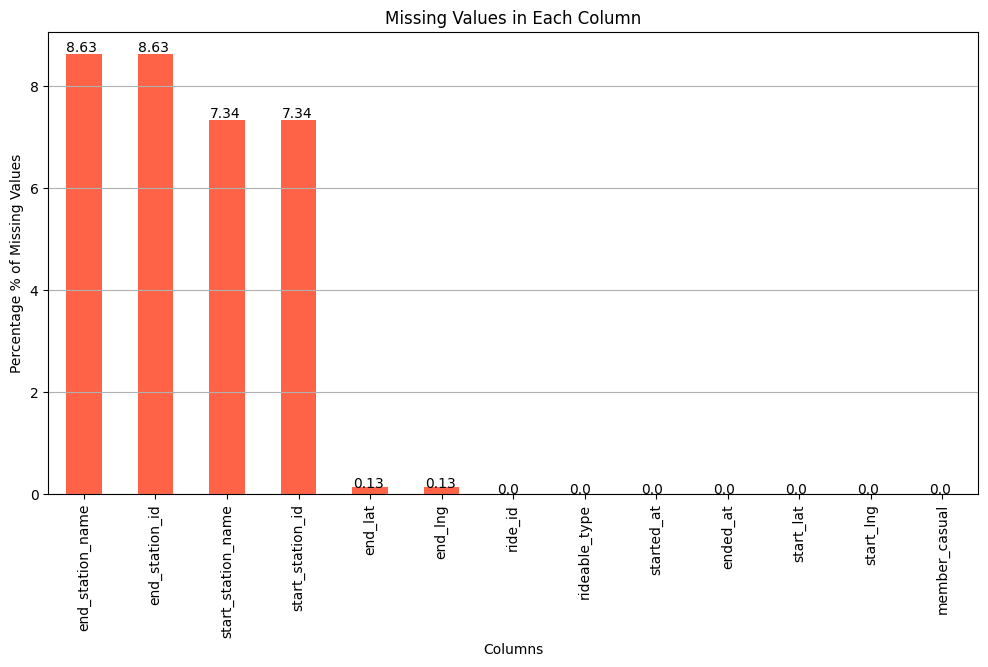

In [7]:
# Create a bar chart of the missing values
ax = missing_values_df['Percentage %'].plot(kind='bar', figsize=(12, 6), color='tomato')

# Set the title and labels
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage % of Missing Values')

# Add gridlines
plt.grid(axis='y')

# Show the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()


#Section C: Case Study Roadmap - Analyze

**Guiding questions**

* How should you organize your data to perform analysis on it?
* Has your data been properly formatted?
* What surprises did you discover in the data?
* What trends or relationships did you find in the data?
* How will these insights help answer your business questions?


**Key Tasks**

1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.


**Deliverable**

*   A summary of your analysis


**Organizing the Data:** The data is organized in a structured format like a table where each row represents a bike trip and there are 13 columns: **ride_id, rideable_type, started_at, ended_at,start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng,** and **member_casual**.

**Data Formating:** I will perform data formatting to conduct calculations. Specifically, I need to calculate the duration of each trip. While this detail is not readily available, it can be derived using the columns **'started_at'** and **'ended_at'** However, upon checking the data type of these columns, it's evident that these values are not maintained in DateTime format. Similarly, I am interested in analyzing trends across days of the week, but this can only be accomplished once the columns are in DateTime format.

**Surprises in the Data:** I had hope to explore relationship if certain locations are more popular with casual riders than annual members. But when analyzing the Station Name for pick up and drop off, I can see that nearly 9% of rides do not have this data shared. It is interesting to note that **70%** of rides are contributed by annual members whereas casual rides contribute make up only **30%** of the total riders for the first Quarter of 2021.

**Trends or relationships:** I will be analyzing trends if usage patterns varying with time of day, day of the week, or month of the year

**Insights for business questions:** The insights from the data can help us understand the behavior of casual riders and members, which can inform strategies to convert casual riders into members. For example, if we find that casual riders often take long leisure rides on weekends, a marketing campaign could highlight the cost savings of an annual membership for frequent weekend use. If members tend to use bikes for commuting, emphasizing the convenience and availability of bikes near residential and commercial areas could be another strategy.

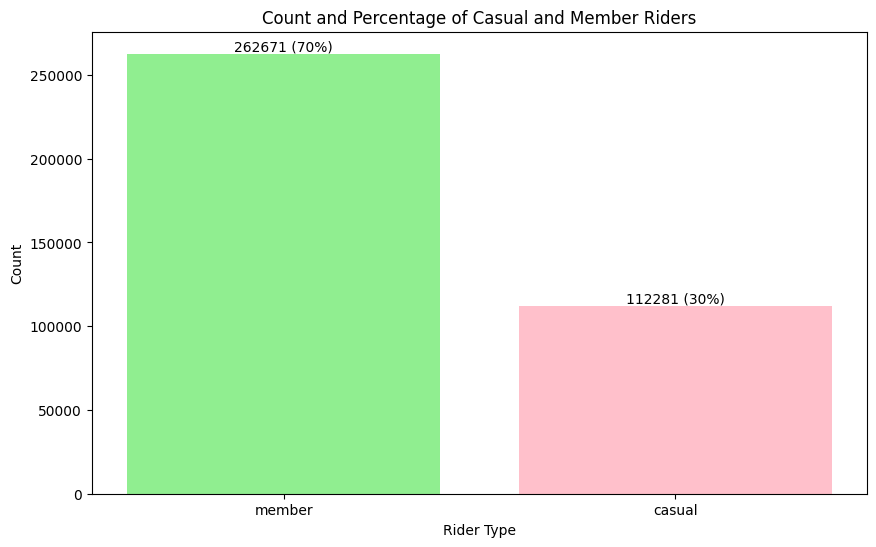

In [8]:
counts = all_data['member_casual'].value_counts()
percentages = all_data['member_casual'].value_counts(normalize=True) * 100

plt.figure(figsize=(10,6))

# Bar chart for counts
bars = plt.bar(counts.index, counts, color=['lightgreen', 'pink'])
plt.ylabel('Count')
plt.title('Count and Percentage of Casual and Member Riders')
plt.xlabel('Rider Type')

# Add count and percentage on top of each bar
for bar, count, percentage in zip(bars, counts, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{count} ({percentage:.0f}%)', ha='center', va='bottom')

plt.show()


### Create a column called **“ride_length”** Calculate the length of each ride by subtracting the column **“started_at”** from the column **“ended_at”** and format as HH:MM:SS

In [9]:
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])

all_data['ride_length'] = all_data['ended_at'] - all_data['started_at']

# Convert 'ride_length' to HH:MM:SS format
all_data['ride_length'] = all_data['ride_length'].dt.total_seconds().astype(int).apply(lambda x: '{:02d}:{:02d}:{:02d}'.format(x // 3600, (x % 3600 // 60), x % 60))


In [11]:
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,00:04:04
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,00:10:27
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,00:16:24
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,00:28:59
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,00:17:56


In [12]:
# Create a new column 'day_of_week'
all_data['day_of_week'] = all_data['started_at'].dt.day_name()

# Display the updated DataFrame
all_data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,00:04:04,Tuesday
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,00:10:27,Sunday
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,00:16:24,Thursday
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,00:28:59,Thursday
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,00:17:56,Sunday


In [14]:
#removing the columns ride_id, start_lat, start_lng, end_lat and end_long as these do not contain useful information for analysis

# Assuming all_data is your DataFrame
columns_to_drop = ['ride_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
all_data = all_data.drop(columns=columns_to_drop)
all_data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_week
0,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,casual,00:04:04,Tuesday
1,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,casual,00:10:27,Sunday
2,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,casual,00:16:24,Thursday
3,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,casual,00:28:59,Thursday
4,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,casual,00:17:56,Sunday


In [28]:
# Replace null values in 'start_station_name' and 'end_station_name' with 'Not Available'
all_data['start_station_name'].fillna('Not Available', inplace=True)
all_data['end_station_name'].fillna('Not Available', inplace=True)

# Replace null values in 'start_station_id' and 'end_station_id' with 'Unknown'
all_data['start_station_id'].fillna('Unknown', inplace=True)
all_data['end_station_id'].fillna('Unknown', inplace=True)

# Check if there are any missing values
missing_values_sum4 = all_data.isnull().sum().sort_values(ascending=False)
missing_values_sum4


rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64

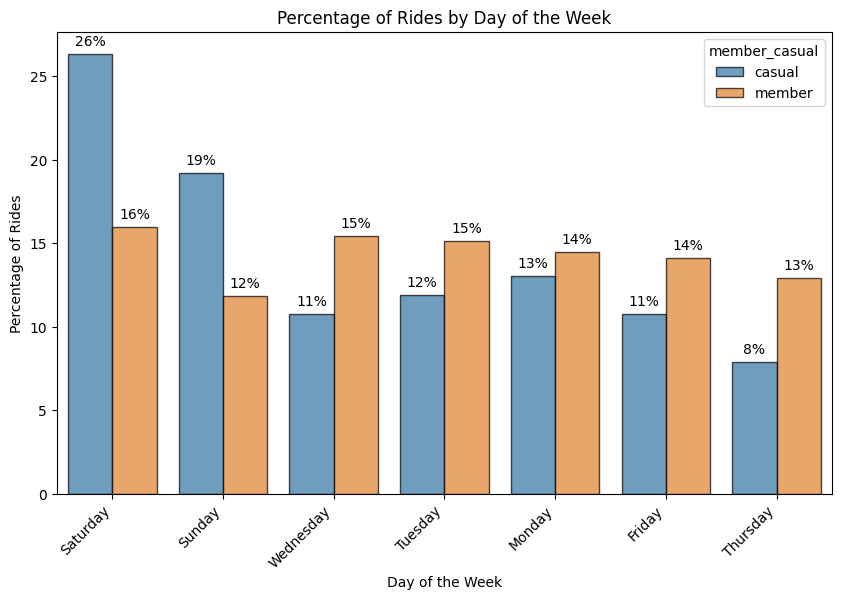

In [50]:
# Calculate the count and percentage of rides for each day of the week and user type
day_counts = all_data.groupby(['member_casual', 'day_of_week']).size()
percentage_counts = day_counts.groupby(level=0, group_keys=False).apply(lambda x: 100 * x / x.sum()).reset_index(name='percentage_of_rides')

# Sort the DataFrame by 'percentage_of_rides' in descending order for casual riders
percentage_counts_sorted = percentage_counts.sort_values(['percentage_of_rides','member_casual'], ascending=[False, False])

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='day_of_week', y='percentage_of_rides', hue='member_casual', data=percentage_counts_sorted, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Percentage of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Rides')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add percentage on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height():.0f}%",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')

# Show the plot
plt.show()




*   **Casual riders**: The percentage of rides by casual riders peaks on Saturday at **26%**, and is lowest on Thursday at **8%**. The percentage fluctuates significantly throughout the week.
*   **Member riders**: The percentage of rides by member riders is fairly consistent throughout the week, ranging from **11% to 16%**, with no significant spikes or drops.
<p><br>

This chart illuminates the distinct usage patterns of Cyclistic bikes for casual and member riders across different days of the week. Notably, casual riders exhibit a peak in usage on Saturdays, while member riders maintain consistent utilization across the week. A shared trend among both user categories is the heightened demand on Saturdays. Additionally, intriguingly, Monday sees increased activity among annual members, potentially indicating a preference for commuting to work by bike. This information holds strategic implications, such as targeting promotions for casual riders on Saturdays or ensuring bike availability on days with consistent member demand.

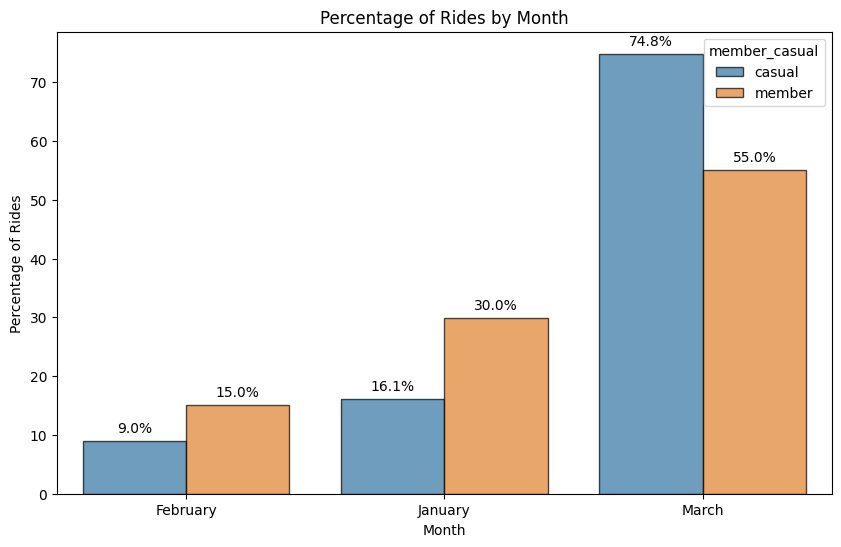

In [55]:
# Extract the month from the 'started_at' column
all_data['month'] = all_data['started_at'].dt.month_name()

# Calculate the count for each month for each user type
month_counts = all_data.groupby(['member_casual', 'month']).size()

# Calculate the percentage of the sum of counts within each user type
percentage_counts = month_counts.groupby(level=0,group_keys=False).apply(lambda x: 100 * x / x.sum())

# Reset the index to make 'member_casual' a column again
percentage_counts = percentage_counts.reset_index()
percentage_counts.columns = ['member_casual', 'month', 'percentage_of_rides']

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='month', y='percentage_of_rides', hue='member_casual', data=percentage_counts, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Percentage of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Rides')

# Add percentage on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f') + '%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

# Show the plot
plt.show()


**Overall Growth:** There is a general upward trend in bike rides, indicating a growth in usage over the observed months.

**Seasonal Patterns:** The chart suggests a possible seasonal pattern, with March experiencing the highest overall percentage of rides. Seasonal factors such as weather conditions or events might be influencing this pattern.

**Casual Rider Behavior:** Casual riders show a significant increase in the percentage of rides, especially from January to March. This could be due to various factors, such as improving weather conditions or promotional campaigns targeting casual riders. Casual riders seem to use bikes as a leisure activity

**Member Rider Consistency:** While there is an increase in the percentage of rides for member riders, their usage remains more consistent compared to casual riders. This could indicate that members maintain a more stable usage pattern over the observed months.It could also indicate that while in summer season there are more bike riders, season alone does not impact the need of the members to use bikes. They seem to use bikes to commute to work